## Problem Formulation

- The factors that affect car prices
- Predict car prices based on data

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
# Loading raw data
df = pd.read_csv(r"CarPrice_Assignment.csv")
print(df.shape)
df.head(3)

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


## Data Preprocessing

### EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [23]:
df.nunique().sort_values(ascending=False)

car_ID              205
price               189
curbweight          171
CarName             147
carlength            75
horsepower           59
wheelbase            53
carheight            49
carwidth             44
enginesize           44
boreratio            38
stroke               37
compressionratio     32
highwaympg           30
citympg              29
peakrpm              23
fuelsystem            8
cylindernumber        7
enginetype            7
symboling             6
carbody               5
drivewheel            3
doornumber            2
fueltype              2
enginelocation        2
aspiration            2
dtype: int64

In [25]:
# Handling NULL values, if any

# let price columns has null values
# df["price"][df["price"].isna()] = df["price"].mean()               (will set all null values in price with its mean)

#### Investigating numerical variables in scatterplots

F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


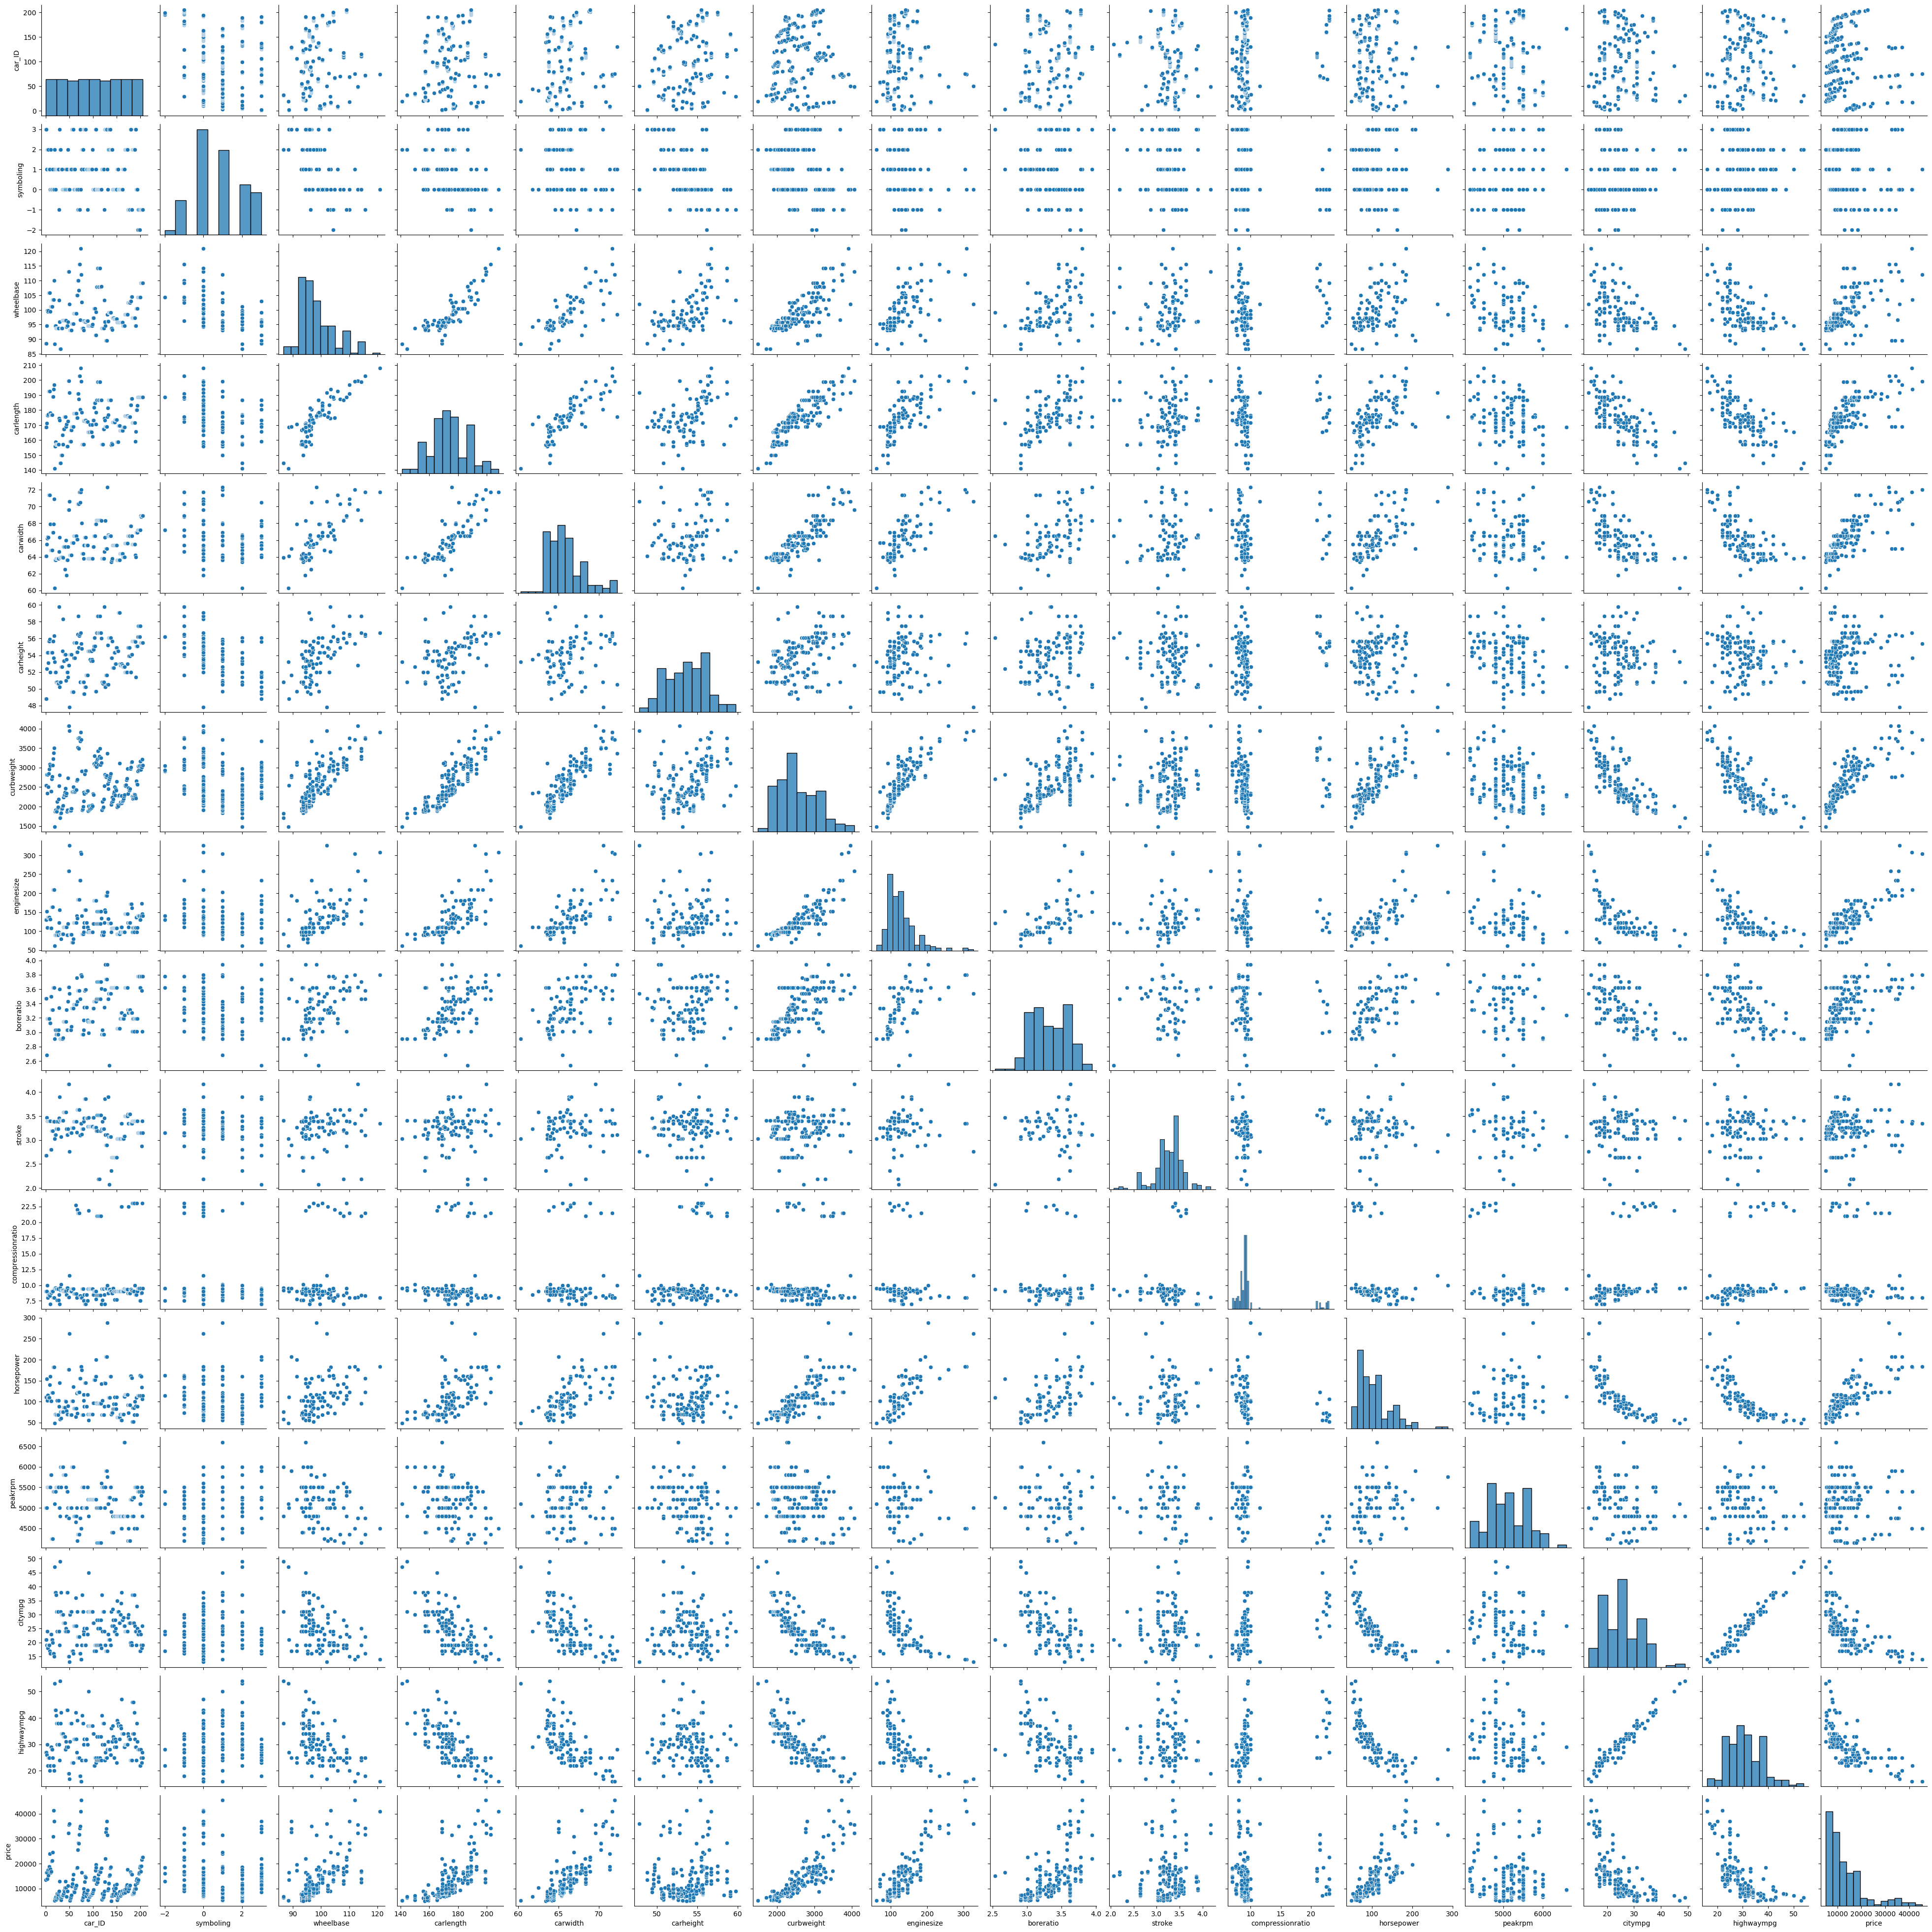

In [27]:
# Getting bigger picture by ploting for each variables
# For large dataset, we plot graph by selecting columns or by making small sets of columns.
g = sns.pairplot(df)
plt.show()

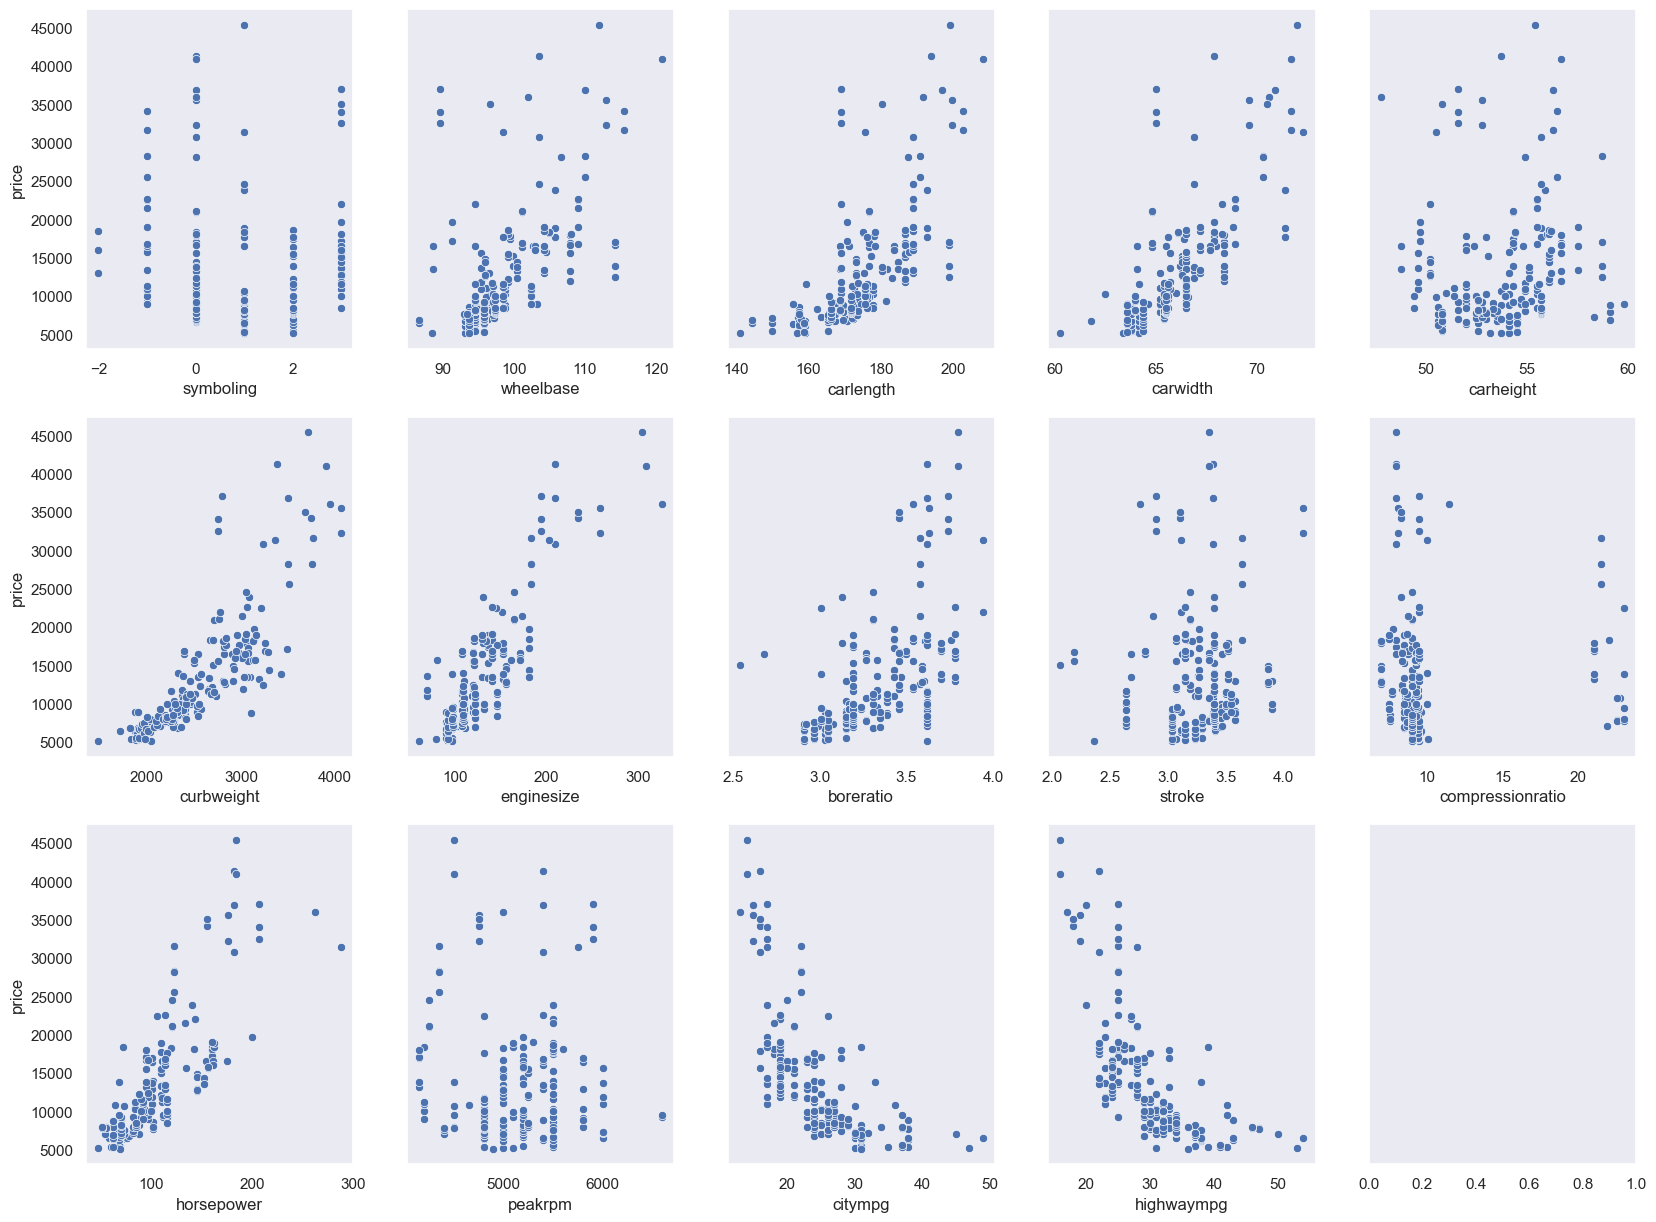

In [65]:
# sns.set()       # used to set seaborn style even if use use only matplotlib
                  # use this if using only matplotlib
sns.set_style("dark")
# sequential_colors = sns.color_palette("RdPu",10)

fig, axs = plt.subplots(nrows=3, ncols=5, sharey=True, figsize=(20,15))

sns.scatterplot(ax=axs[0,0], x=df["symboling"], y=df["price"])
sns.scatterplot(ax=axs[0,1], x=df["wheelbase"], y=df["price"])
sns.scatterplot(ax=axs[0,2], x=df["carlength"], y=df["price"])
sns.scatterplot(ax=axs[0,3], x=df["carwidth"], y=df["price"])
sns.scatterplot(ax=axs[0,4], x=df["carheight"], y=df["price"])
sns.scatterplot(ax=axs[1,0], x=df["curbweight"], y=df["price"])
sns.scatterplot(ax=axs[1,1], x=df["enginesize"], y=df["price"])
sns.scatterplot(ax=axs[1,2], x=df["boreratio"], y=df["price"])
sns.scatterplot(ax=axs[1,3], x=df["stroke"], y=df["price"])
sns.scatterplot(ax=axs[1,4], x=df["compressionratio"], y=df["price"])
sns.scatterplot(ax=axs[2,0], x=df["horsepower"], y=df["price"])
sns.scatterplot(ax=axs[2,1], x=df["peakrpm"], y=df["price"])
sns.scatterplot(ax=axs[2,2], x=df["citympg"], y=df["price"])
sns.scatterplot(ax=axs[2,3], x=df["highwaympg"], y=df["price"])

plt.show()

F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


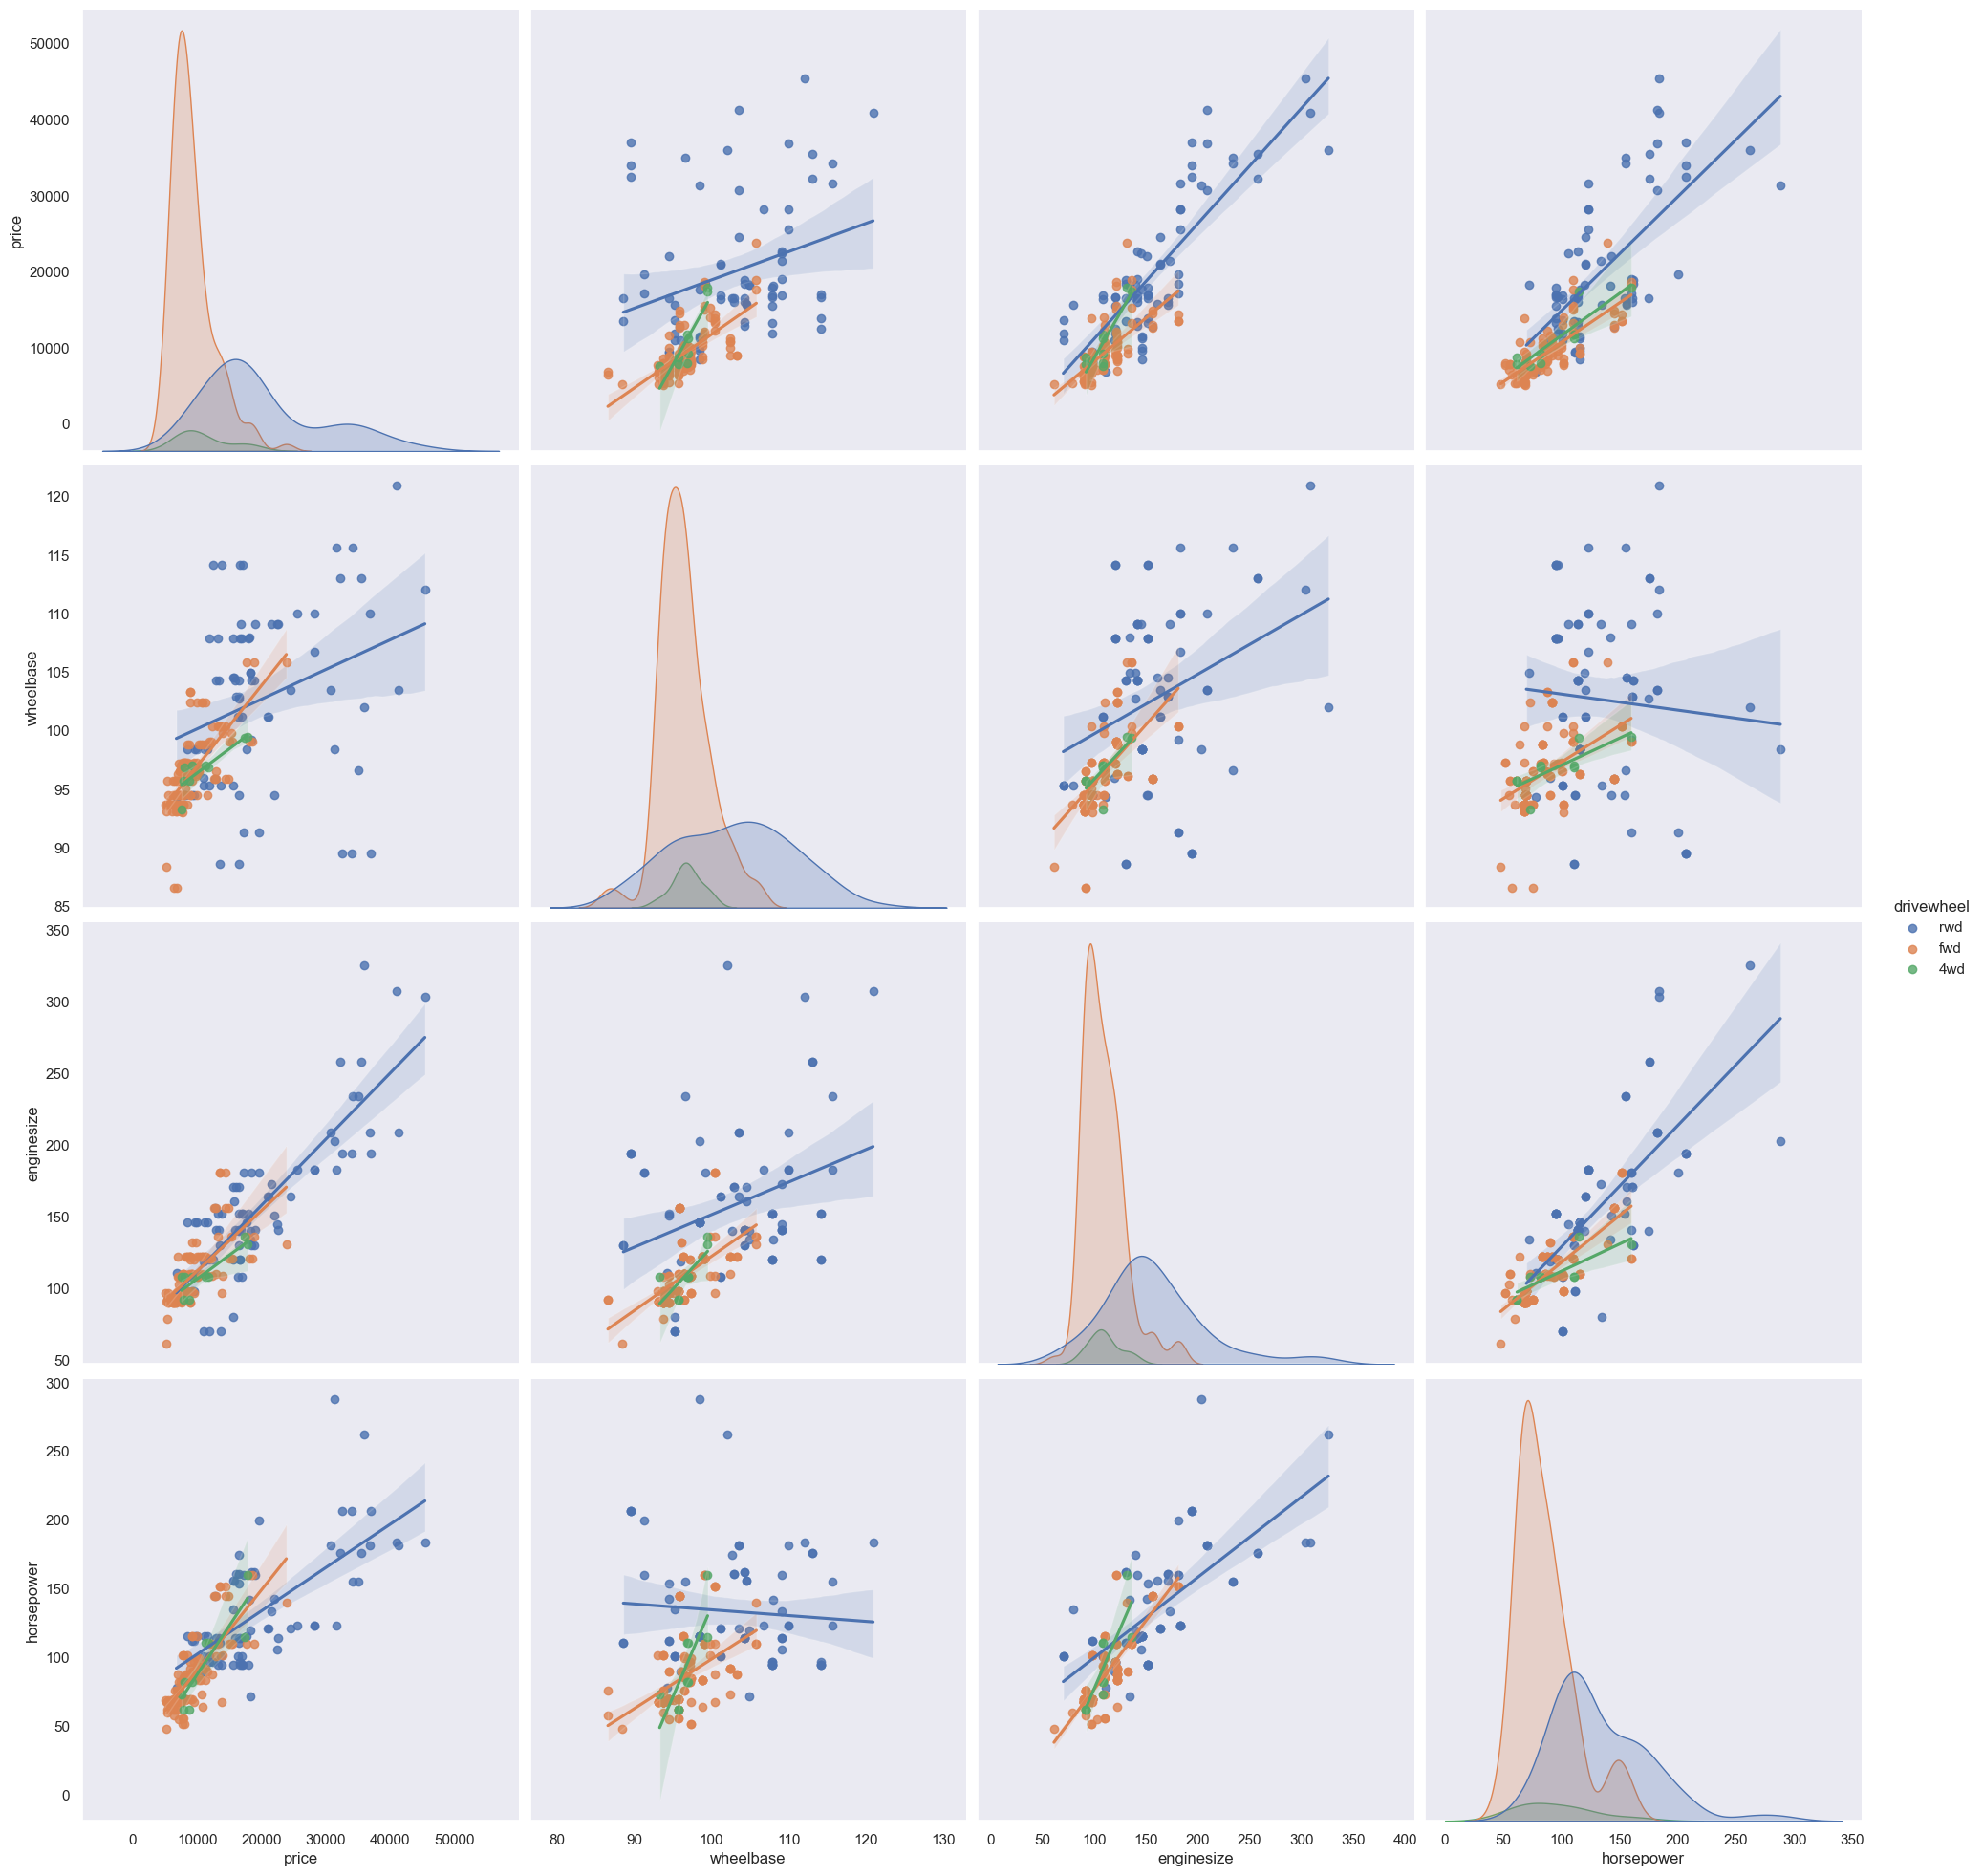

In [68]:
# Subset of data- important features (based on linear relation)

# kind="reg"   adding regression line to show the rate in increase in y value
sns.pairplot(df[["price", "wheelbase", 'enginesize', 'horsepower', 'drivewheel']], hue='drivewheel', height=5, kind="reg")
plt.show()

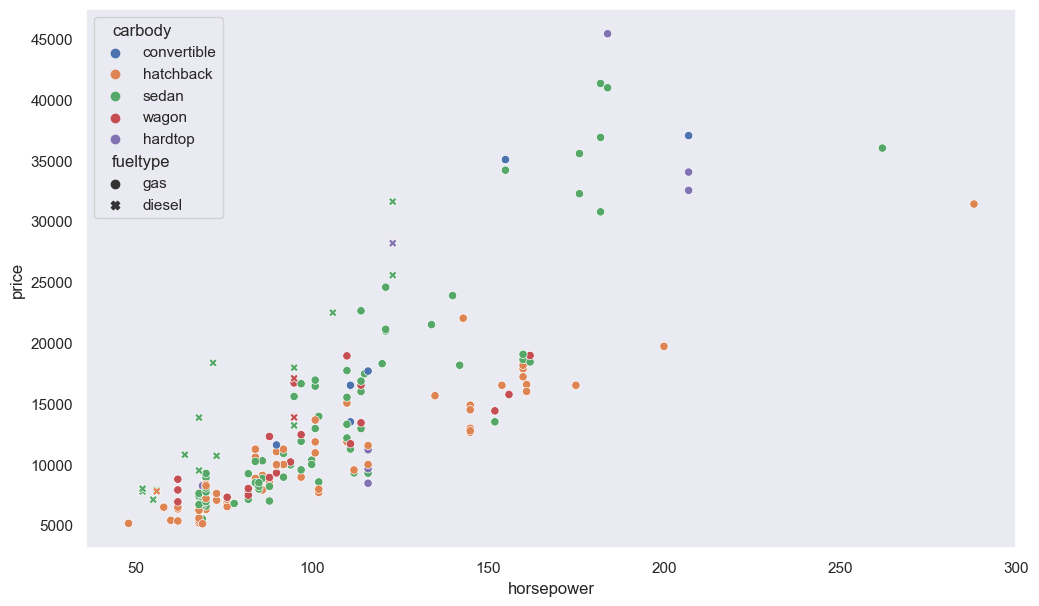

In [87]:
'''
compared to other, horsepower shows not much deviation in prices for a very large scale of price. (enginesize is also fine)
it shows pretty much similar rate of increase
'''
# Its better to consider variables with less unique counts to plot
# further investigating price vs horsepower by carbody and fueltype   (just randomly considering)

plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x="horsepower", y="price", hue="carbody", style='fueltype')
plt.show()

#### Investigating categorical variables

,carbody,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10376.652386
3,sedan,14344.270833
4,wagon,12371.960000


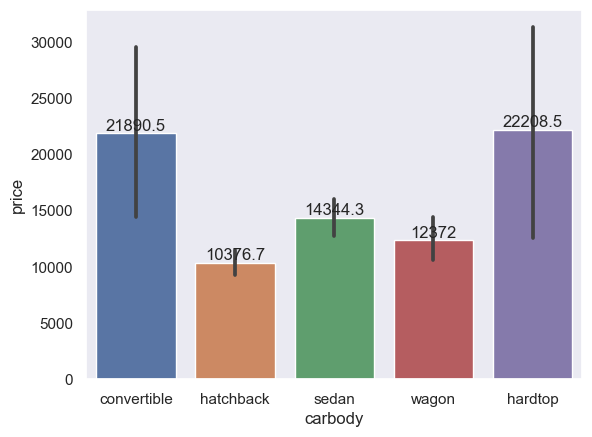

In [88]:
ax = sns.barplot(data=df, x="carbody", y="price")
ax.bar_label(ax.containers[0])
'''
In barplot:
    Lines signify confidence interval
    Takes mean by default
'''

df[['carbody', 'price']].groupby('carbody', as_index=False).agg({'price':'mean'})

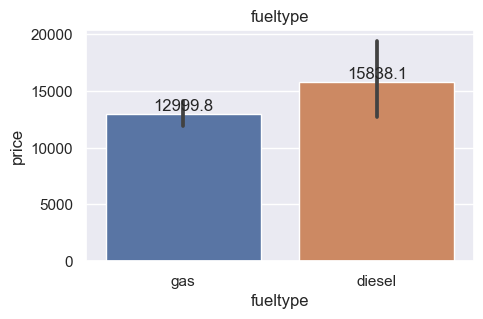

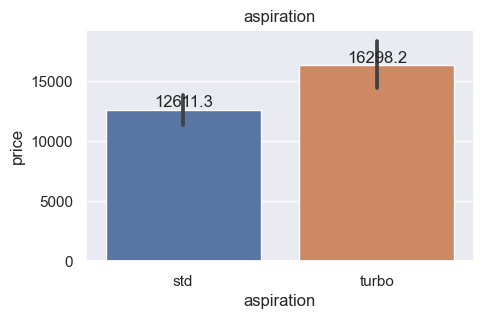

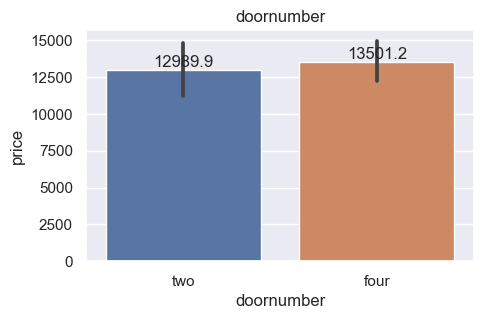

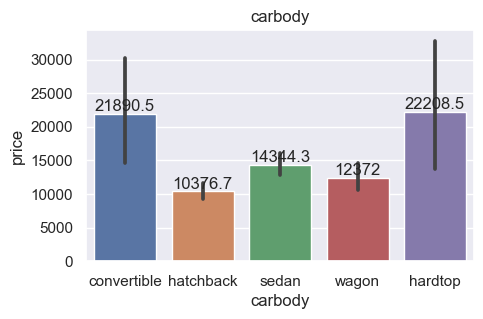

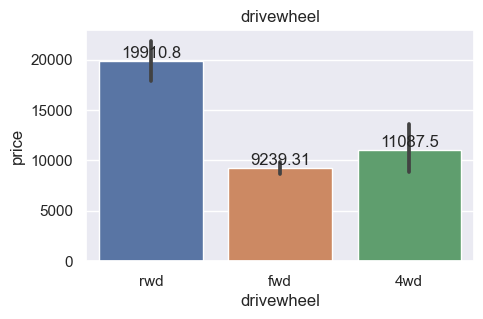

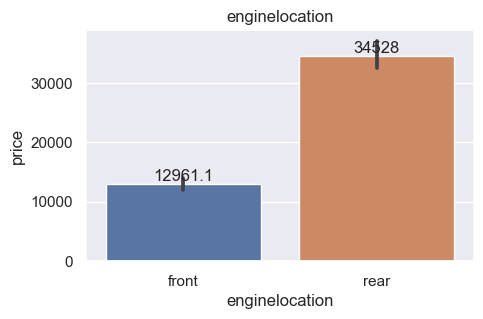

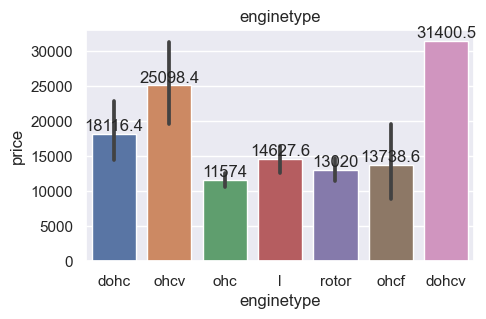

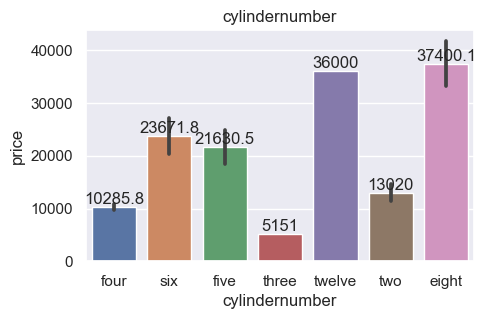

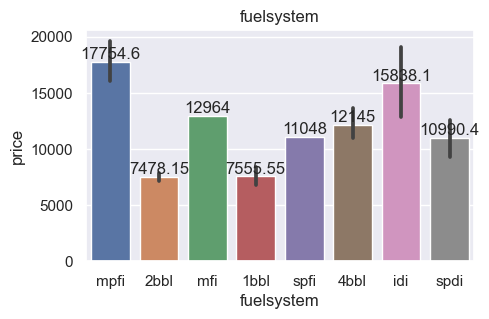

In [96]:
# Total prices of carbody for multiple categories

categories = df.select_dtypes(include='object').drop(columns="CarName")

sns.set(rc={'figure.figsize':(5,3)})

for c in categories.columns:
    ax = sns.barplot(data=categories, x=c, y=df['price'])
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

#### Investigating distribution with disti plots

C:\Users\ASD\AppData\Local\Temp\ipykernel_5388\2394492129.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='blue')


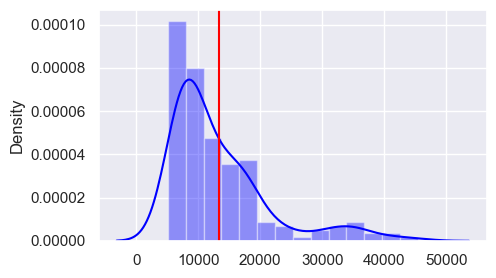

In [98]:
# investigating distribution of price and adding mean
x = df['price'].values

sns.distplot(x, color='blue')
mean = df['price'].mean()

# ploting mean
plt.axvline(x=mean, ymin=0, ymax=1, color='red')
plt.show()